<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Este projeto de análise exploratória de dados tem como objetivo analisar informações de logística relacionadas à entrega de mercadorias. O conjunto de dados contém informações sobre as entregas, incluindo localizações geográficas, capacidade dos veículos e tamanho das cargas. A análise busca compreender a distribuição geográfica das entregas, identificar padrões de demanda e otimizar a logística de transporte na região. O projeto visa melhorar a eficiência das operações de transporte, reduzir custos e aprimorar a experiência do cliente.

## 2\. Pacotes e bibliotecas

In [2]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

# Importando as bibliotecas padrão do Python
import json
import os

# Importando pacotes de terceiros para análise de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# A partir deste ponto, você pode importar outras bibliotecas ou pacotes específicos para o seu projeto, caso necessário.

# Agora, vamos carregar os dados do arquivo JSON e realizar a leitura dos dados.
data_file = "deliveries.json"

# Verificando se o arquivo existe antes de tentar lê-lo
if os.path.exists(data_file):
    with open(data_file, "r") as file:
        data = json.load(file)
else:
    print(f"O arquivo '{data_file}' não foi encontrado. Verifique o caminho do arquivo.")

# Agora que os dados foram carregados, você pode continuar com a análise exploratória dos mesmos.

## 3\. Exploração de dados

In [ ]:
# Realizando o wrangling da estrutura dos dados e transformando em um DataFrame do pandas
deliveries_df = pd.DataFrame(data)

# Visualizando as primeiras linhas do DataFrame para entender a estrutura dos dados
print(deliveries_df.head())

# Verificando as informações do DataFrame
print(deliveries_df.info())

# Verificando a descrição estatística dos dados numéricos
print(deliveries_df.describe())

# Exploração do Schema: verificando as colunas disponíveis e seus tipos de dados
print(deliveries_df.dtypes)

# Exploração visual de algumas informações
# Exemplo: contagem de entregas por região do hub
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=deliveries_df)
plt.title('Contagem de Entregas por Região do Hub')
plt.xlabel('Região do Hub')
plt.ylabel('Contagem de Entregas')
plt.xticks(rotation=45)
plt.show()

## 4\. Manipulação

In [30]:
# Criando listas vazias para armazenar as informações das entregas
ids = []
latitudes = []
longitudes = []
sizes = []

# Iterando sobre os dados e extraindo as informações das entregas
for instance in data:
    for delivery in instance['deliveries']:
        ids.append(delivery['id'])
        point = delivery.get('point', {})
        latitude = float(point.get('lat', None)) if 'lat' in point else None
        longitude = float(point.get('lng', None)) if 'lng' in point else None
        latitudes.append(latitude)
        longitudes.append(longitude)
        sizes.append(delivery['size'])

# Criando o DataFrame com as informações extraídas
deliveries_df = pd.DataFrame({
    'id': ids,
    'latitude': latitudes,
    'longitude': longitudes,
    'size': sizes
})

# Verificando e preenchendo valores ausentes, caso existam
print(deliveries_df.isnull().sum())

# Exemplo: preenchendo valores ausentes da coluna 'size' com a mediana
median_size = deliveries_df['size'].median()
deliveries_df['size'].fillna(median_size, inplace=True)

# Calculando a distância entre cada entrega e o hub regional
def calculate_distance_to_hub(row):
    hub_latitude = data[0]['origin'].get('lat', None)  # Latitude do hub regional
    hub_longitude = data[0]['origin'].get('lng', None)  # Longitude do hub regional
    delivery_latitude = row['latitude']
    delivery_longitude = row['longitude']
    if hub_latitude is not None and hub_longitude is not None and delivery_latitude is not None and delivery_longitude is not None:
        return ((delivery_latitude - hub_latitude)**2 + (delivery_longitude - hub_longitude)**2)**0.5
    return None


id           0
latitude     0
longitude    0
size         0
dtype: int64


## 5\. Visualização

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


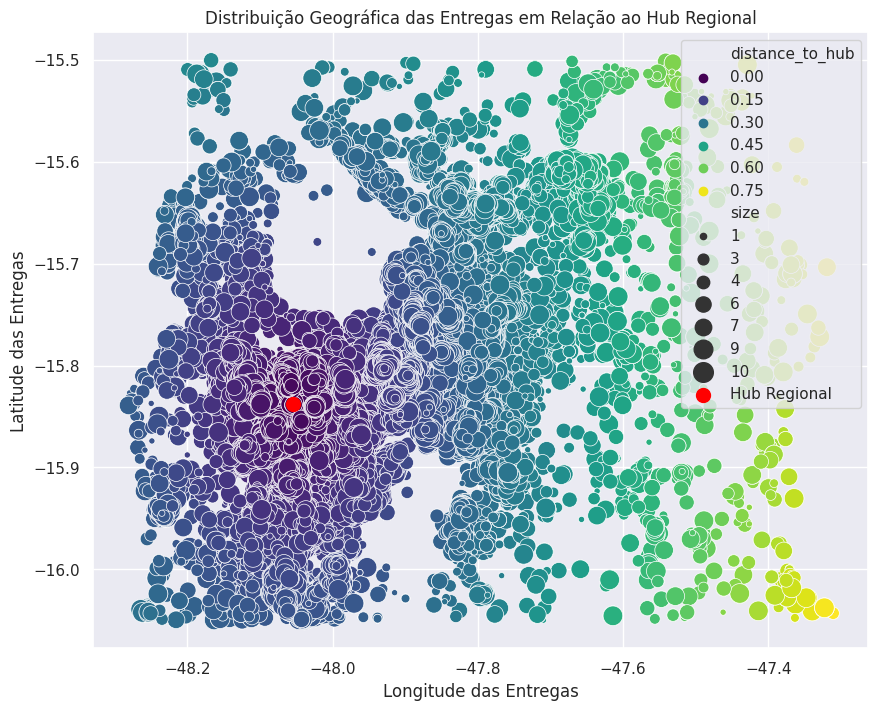

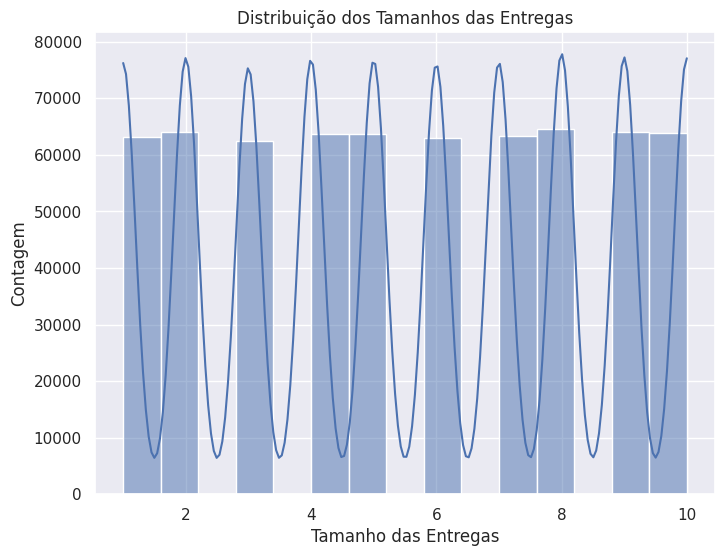

In [31]:
# Criando a coluna 'distance_to_hub'
deliveries_df['distance_to_hub'] = deliveries_df.apply(calculate_distance_to_hub, axis=1)

# Arredondando os valores da coluna 'distance_to_hub' para torná-la categórica
deliveries_df['distance_to_hub'] = deliveries_df['distance_to_hub'].round(2)

# Agora, vamos criar as visualizações dos dados

# Adicionando sns.set() para definir as configurações padrão do Seaborn
sns.set()

# Visualização 1: Gráfico de Dispersão para mostrar a distribuição geográfica das entregas em relação ao hub regional
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=deliveries_df, hue='distance_to_hub', palette='viridis', size='size', sizes=(20, 200))
plt.scatter(data[0]['origin']['lng'], data[0]['origin']['lat'], color='red', s=100, label='Hub Regional')
plt.title('Distribuição Geográfica das Entregas em Relação ao Hub Regional')
plt.xlabel('Longitude das Entregas')
plt.ylabel('Latitude das Entregas')
plt.legend()
plt.show()

# Visualização 2: Gráfico de Barras para mostrar a distribuição dos tamanhos das entregas
plt.figure(figsize=(8, 6))
sns.histplot(data=deliveries_df, x='size', bins=15, kde=True)
plt.title('Distribuição dos Tamanhos das Entregas')
plt.xlabel('Tamanho das Entregas')
plt.ylabel('Contagem')
plt.show()